In [1]:
#  Works for Siemens TWIX, Prisma 
import sys
sys.path.append('/home/sapje1/code/suspect')
import suspect
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
# wand 3t megapress
#data_dir = '/home/sapje1/data_sapje1/projects/wand/mrs/19_06_14-11_17_09-DST-1_3_12_2_1107_5_2_43_66073/scans/502-RAW_anonymised/resources/TWIX/files'
#twix_file = 'meas_MID00465_FID13471_mpress_AC_met.dat'

#wand slaser 7T 
data_dir = '/home/sapje1/data_sapje1/projects/wand/mrs_7t'
#twix_file = 'meas_MID68_slaser_AC_met_FID113307.dat'
twix_file = 'meas_MID101_slaser_SMleft_met_FID79132.dat'

#covid bbb brainstem 7t
data_dir = '/home/sapje1/data_sapje1/projects/covidbbb/017'
twix_file = 'meas_MID156_sLaser_Brainstem_20_12_12_FID7821.dat'

full_path = os.path.join(data_dir, twix_file)
print(full_path)

/home/sapje1/data_sapje1/projects/covidbbb/017/meas_MID156_sLaser_Brainstem_20_12_12_FID7821.dat


In [4]:
twix_data = suspect.io.twix.load_twix(full_path)
# shape of twix data is (edit_on/edit_off, average, Rx_channel, n_points)
print(twix_data)
print(twix_data.shape)
print(type(twix_data))

/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 48
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 34
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 39
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 37
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 38
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 43
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 41
  match = re.findall(rgx, header_string)


<MRSBase instance f0=297.219693MHz TE=7.0ms dt=0.0833ms>
(120, 32, 4096)
<class 'suspect.mrsobjects.MRSData'>


In [5]:
# freq domain plot, single average, single channel, single editon/editoff
plt.plot(twix_data[0].time_axis(), twix_data[0,0,0].spectrum())

AttributeError: 'numpy.complex128' object has no attribute 'spectrum'

In [6]:
twix_data.ndim

3

In [ ]:
# for edited data, deal with edit on/ edit off separately
# channel0 is edit off, channel1 is edit on
comb_channels0 = suspect.processing.channel_combination.combine_channels(twix_data[0])
comb_channels1 = suspect.processing.channel_combination.combine_channels(twix_data[1])
avg_comb_channels0 = np.mean(comb_channels0,0)
avg_comb_channels1 = np.mean(comb_channels1,0)
f_ppm = avg_comb_channels0.frequency_axis_ppm()

In [ ]:
# plot the results of combining and averaging 
fig,ax = plt.subplots()
ax.plot(f_ppm, np.real(1e5*avg_comb_channels0.spectrum()), \
        f_ppm, np.real(1e5*avg_comb_channels1.spectrum()))
ax.set_xlim(4.5,1)
ax.set_ylim(-3,25)

/home/sapje1/miniconda2/envs/suspect/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


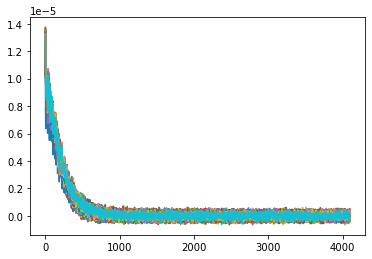

In [6]:
b = np.arange(0,4096)

out = plt.plot(b, avg_comb_channels0.spectrum() )

In [9]:
f_ppm = avg_comb_channels0.frequency_axis_ppm()
print(f_ppm.shape)

(4096,)


/home/sapje1/miniconda2/envs/suspect/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


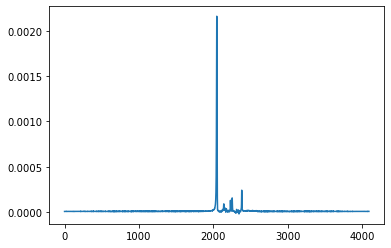

(4096,)


/home/sapje1/miniconda2/envs/suspect/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


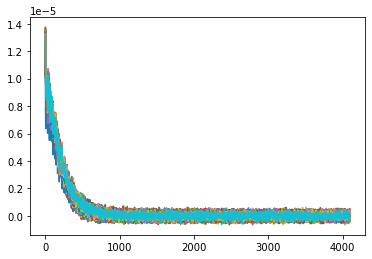

In [13]:
print(comb_channels0.shape)

(160, 4096)
